In [65]:
%matplotlib inline
import pandas as pd
import numpy as np
from utilities import plotting
from utilities import stats
from utilities import timestamps
from utilities import import_export
from utilities import polygon_selection
from mpl_toolkits.basemap import Basemap
from itertools import product
import matplotlib.pyplot as plt
import bs4 as bs

def calc_b_value_for_parameters(dataframe, parameters, location):
    rows = []
    try:
        for r, t in parameters:
            df_c = polygon_selection.get_node_data(node=location, data=dataframe, radius=r, m=1)
            df_c = df_c.loc[df_c.index >= t]

            a, b, bstd, n, mc = stats.calc_fmd_stats_with_mc(df_c.mag)
            row = np.array((r,) + (t,) + (a, b, bstd, n, mc) + tuple(location))
            rows.append(row)
    except:
        row = np.array((r,) + (t,) +(np.nan, np.nan, np.nan, np.nan, np.nan) + tuple(location))
    
    return rows

def calc_b_for_parameters_attr_iter(attr):
    dataframe, parameters, location = attr
    return calc_b_value_for_parameters(dataframe, parameters, location)

def parse_coords(c):
    c = c.replace('\t', '')
    c = c.replace('\n', '')
    c = c.strip()
    c = c.split(' ')
    c = [[float(co) for co in coord.split(',')] for coord in c]
    c = np.array([np.array(co) for co in c])
    return c

In [71]:
df = import_export.import_catalog(location='/home/max/research/kumamoto/data/ccu.dat', delimiter='\t', names=['lon', 'lat', 'decimal_year', 'month', 'day', 'mag'
                                                        , 'depth', 'hour', 'minute', 'second', 'horizontal_error'
                                                        , 'depth_error', 'mag_err'])

soup = bs.BeautifulSoup(open('/home/max/research/kumamoto/data/kyushu_fault.kml'), 'lxml')
fault_coordinates = [parse_coords(tag.text) for tag in soup.findAll('coordinates')]

In [5]:
kumamoto = {'coordinates':(130.763, 32.7545), 'time':'2016-04-14 12:26:00', 'tz':'UTC', 'magnitude':7.0}
eq = kumamoto

In [11]:
df_regional = polygon_selection.get_node_data(data=df, node=eq['coordinates'], radius=250, m=1)

In [12]:
df_regional = df_regional.loc[df_regional.index < eq['time']]
df_regional = df_regional[df_regional.depth <=25]
df_regional = df_regional[df_regional.mag >= 0.5]

(<matplotlib.figure.Figure at 0x7fcd83f08b38>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fcdc0618390>)

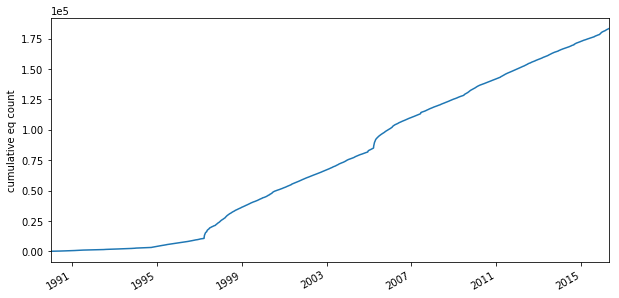

In [13]:
fig, ax = plt.subplots(figsize=(10,5))
plotting.plot_seismicity_rate(dataframe=df_regional[df_regional.mag>=0.5], fig=fig, ax=ax)

In [153]:
radii = np.arange(5, 25, 1)
foreshock_time = eq['time']

timii = pd.date_range(start='01-01-2000 00:00:00', end='01-01-2005', freq='12M', tz='GMT')
parameters = [x for x in product(radii, timii)]

In [154]:
len(parameters)

100

(<mpl_toolkits.basemap.Basemap at 0x7fcd839e59b0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fcd1d1877f0>)

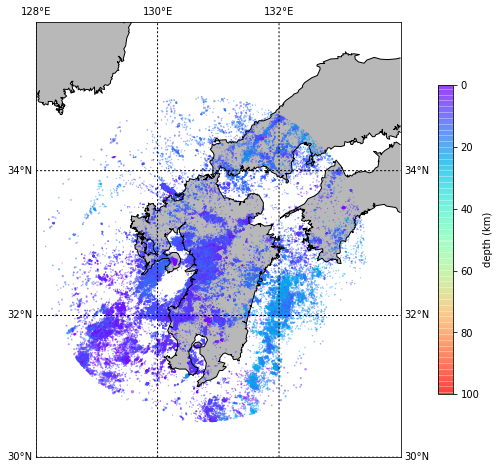

In [155]:
# fig, ax = plt.subplots()
plotting.plot_seismicity_map(dataframe=df_regional)

In [156]:
increment = 0.05
lat_min, lat_max = (31, 34.5)
lon_min, lon_max = (129, 133)
lats = np.linspace(lat_min, lat_max, (lat_max - lat_min)/increment + 1)
lons = np.linspace(lon_min, lon_max, (lon_max - lon_min)/increment + 1)
lats_lons = [x for x in product(lons, lats)]

everything = []

for lon_lat in lats_lons:
    everything.append((df_regional, parameters, lon_lat))

/home/max/anaconda2/envs/research/lib/python3.5/site-packages/ipykernel_launcher.py:4: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  after removing the cwd from sys.path.
/home/max/anaconda2/envs/research/lib/python3.5/site-packages/ipykernel_launcher.py:5: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """


In [157]:
len(everything) * len(parameters) * len(lon_lat)

1150200

In [ ]:
from multiprocessing import Pool
pool = Pool()

results = pool.map(calc_b_for_parameters_attr_iter, everything)

/home/max/pymap3/utilities/stats.py:43: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average)**2)/(length*(length-1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:43: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average)**2)/(length*(length-1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:43: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average)**2)/(length*(length-1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:43: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average)**2)/(length*(length-1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:43: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average)**2)/(length*(length-1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:43: RuntimeWarning: invalid value encountered in 

KeyboardInterrupt: 

/home/max/pymap3/utilities/polygon_selection.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  axis=1)
/home/max/pymap3/utilities/polygon_selection.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  axis=1)
/home/max/pymap3/utilities/polygon_selection.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  axis=1)
/

In [ ]:
results_df = [pd.DataFrame(r, columns=['radius', 'start_time', 'a', 'b', 'bstd', 'n', 'mc', 'lon', 'lat']) for r in results]

In [ ]:
results_df = pd.concat(results_df)

In [ ]:
results_avg = results_df.groupby(['lon', 'lat', 'start_time']).mean().reset_index()

In [ ]:
results_df.to_csv('average_b_value_spatial_map_kyushu.csv', index=False)

In [ ]:
results_avg.hist(bins=100, figsize=(8, 8), log=True)

In [52]:
results_2000 = results_avg[results_avg.start_time < '2005']
results_2010 = results_avg[results_avg.start_time > '2005']
results_avg = results_2000.merge(results_2010, on=['lon', 'lat'])

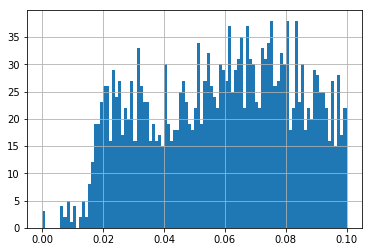

In [132]:
data.bstd_x.hist(bins=100, range=(0, 0.1))

/home/max/anaconda2/envs/research/lib/python3.5/site-packages/ipykernel_launcher.py:12: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  if sys.path[0] == '':
/home/max/anaconda2/envs/research/lib/python3.5/site-packages/ipykernel_launcher.py:13: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  del sys.path[0]


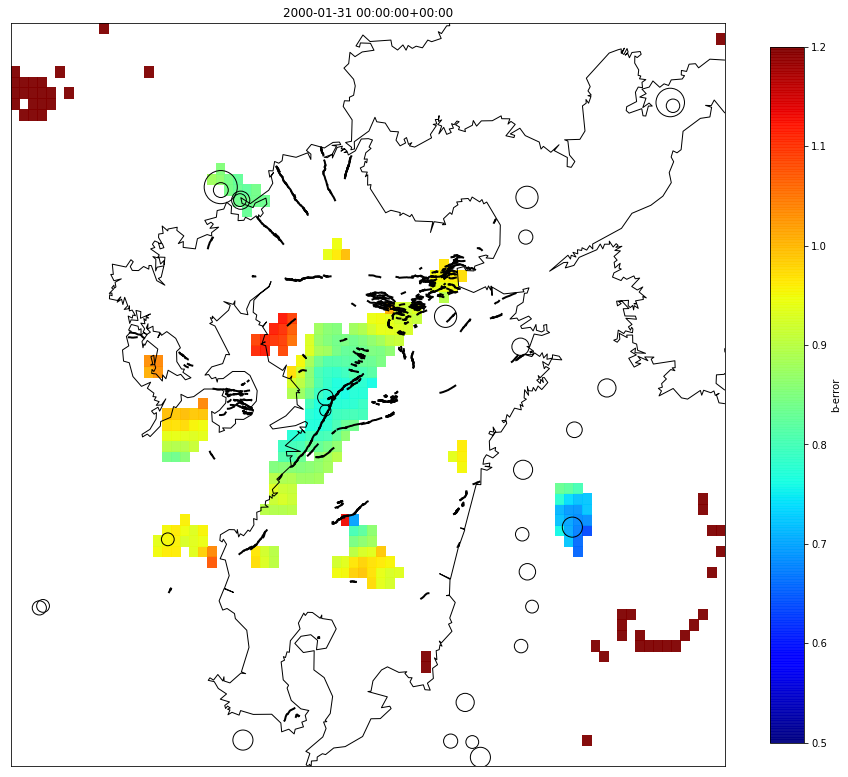

In [143]:
fig, ax = plt.subplots(figsize=(16, 16))


lons = results_avg.lon.values
lats = results_avg.lat.values

lat_min = lats.min()
lat_max = lats.max()
lon_min = lons.min()
lon_max = lons.max()

lon_i = np.linspace(lon_min, lon_max, (lon_max - lon_min)/0.05 + 1)
lat_i = np.linspace(lat_min, lat_max, (lat_max - lat_min)/0.05 + 1)


m = Basemap(projection='merc'
           ,llcrnrlat=lat_min
           ,urcrnrlat=lat_max
           ,llcrnrlon=lon_min
           ,urcrnrlon=lon_max
           ,resolution='i'
           ,area_thresh=1000
           ,ax=ax)

m.drawcoastlines()

data = results_avg.copy()

n_remove = 250
data.ix[data.n_x < n_remove, 'b_x'] = np.nan
# data.ix[data.n_y < n_remove, 'b_y'] = np.nan
data.ix[data.bstd_x >= 0.05, 'b_x'] = np.nan
data.ix[data.bstd_y >= 0.05, 'b_y'] = np.nan

zi = data.pivot(index='lat', columns='lon', values='b_y').values

xi, _yi = m(lon_i, np.zeros_like(lon_i))
_xi, yi = m(np.zeros_like(lat_i), lat_i)

x, y = m(lons, lats)

xi, yi = np.meshgrid(xi, yi)

zi = np.ma.masked_invalid(zi)

cbar = ax.pcolormesh(xi, yi, zi, cmap='jet', vmin=0.5, vmax=1.2, alpha=0.95)

fig.colorbar(cbar, label='b-error', orientation='vertical', shrink=0.8)
ax.set_title(data.start_time_x.head(1)[0])

x, y = m(eq['coordinates'][0], eq['coordinates'][1])
ax.scatter(x, y, s=250, color='None', edgecolor='black')

m5lon, m5lat = df_regional[(df_regional.mag>4.9) & (df_regional.decimal_year.between(1999, 2001))][['lon','lat']].values[0]
x, y = m(m5lon, m5lat)
ax.scatter(x, y, s=125, color='None', edgecolor='black')

for fault in fault_coordinates:
    x, y = m(fault[:,0], fault[:,1])
    ax.plot(x, y, color='black', linewidth=2)
    
eqs = df[(df.mag > 5.0) & (df.decimal_year >= 2000) & (df.decimal_year < 2016)].copy()
x, y = m(eqs.lon.values, eqs.lat.values)
ax.scatter(x, y, s=np.exp(eqs.mag), color='None', edgecolor='black')

In [90]:
eqs = df[(df.mag > 5.0) & (df.decimal_year >= 2000) & (df.decimal_year < 2016)].copy()
eqs.shape

(2911, 13)

/home/max/anaconda2/envs/research/lib/python3.5/site-packages/numpy/lib/function_base.py:747: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/home/max/anaconda2/envs/research/lib/python3.5/site-packages/numpy/lib/function_base.py:748: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


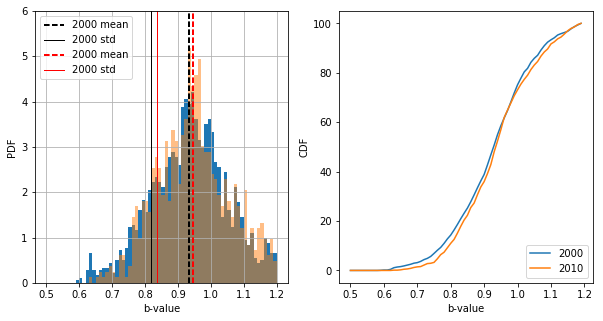

In [126]:


fig, (ax, ax2) = plt.subplots(1,2, figsize=(10, 5))

data.b_x.hist(range=(0.5, 1.2), bins=70, normed=True, ax=ax)
data.b_y.hist(range=(0.5, 1.2), bins=70, ax=ax, normed=True, alpha=0.5)

mean = data[data.b_x.between(0.5, 1.2)].b_x.mean()
std = data[data.b_x.between(0.5, 1.2)].b_x.std()
ax.plot([mean, mean], [0,6], color='black', linestyle='--', linewidth=2, label='2000 mean')
ax.plot([mean - std, mean - std], [0,6], color='black', linestyle='-', linewidth=1, label='2000 std')

mean = data[data.b_y.between(0.5, 1.2)].b_y.mean()
std = data[data.b_y.between(0.5, 1.2)].b_y.std()
ax.plot([mean, mean], [0,6], color='red', linestyle='--', linewidth=2, label='2000 mean')
ax.plot([mean - std, mean - std], [0,6], color='red', linestyle='-', linewidth=1, label='2000 std')
ax.legend()

ax.set_ylim(0, 6)

h, e = np.histogram(data.b_x, range=(0.5, 1.2), bins=70, normed=True )
ch = np.cumsum(h)

ax2.plot(e[:-1], ch, label='2000')

h, e = np.histogram(data.b_y, range=(0.5, 1.2), bins=70, normed=True )
ch = np.cumsum(h)

ax2.plot(e[:-1], ch, label='2010')

ax2.legend(loc='lower right')
ax2.set_xlabel('b-value')
ax.set_ylabel('PDF')
ax2.set_ylabel('CDF')
ax.set_xlabel('b-value')

In [100]:
data.b_x.mean()

1.0124139647395034

In [ ]:
print('df')

/home/max/anaconda2/envs/research/lib/python3.5/site-packages/ipykernel_launcher.py:12: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  if sys.path[0] == '':
/home/max/anaconda2/envs/research/lib/python3.5/site-packages/ipykernel_launcher.py:13: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  del sys.path[0]


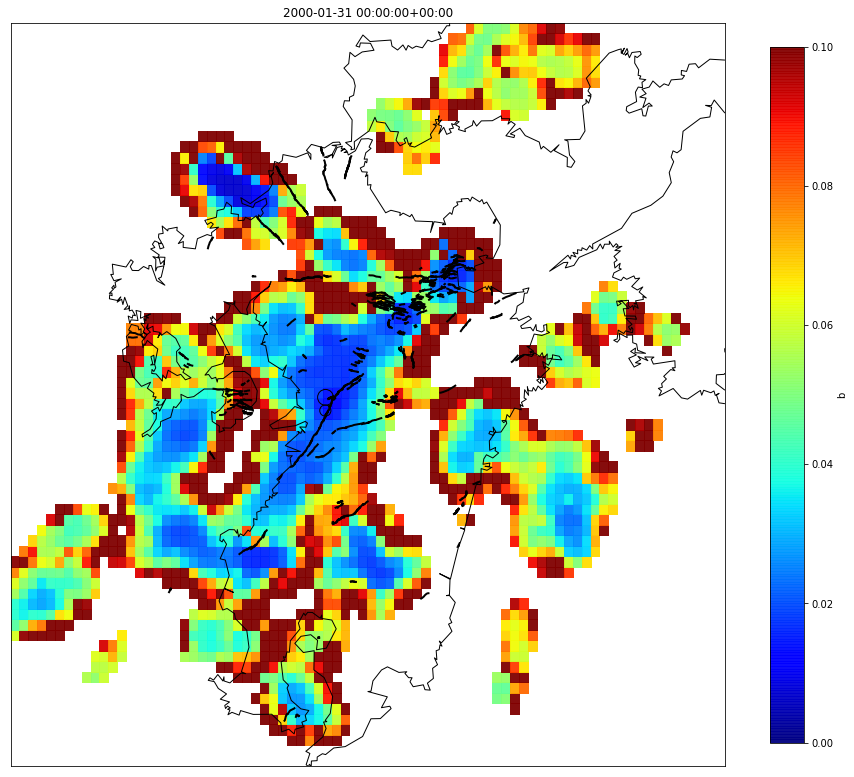

In [77]:
fig, ax = plt.subplots(figsize=(16, 16))


lons = results_avg.lon.values
lats = results_avg.lat.values

lat_min = lats.min()
lat_max = lats.max()
lon_min = lons.min()
lon_max = lons.max()

lon_i = np.linspace(lon_min, lon_max, (lon_max - lon_min)/0.05 + 1)
lat_i = np.linspace(lat_min, lat_max, (lat_max - lat_min)/0.05 + 1)


m = Basemap(projection='merc'
           ,llcrnrlat=lat_min
           ,urcrnrlat=lat_max
           ,llcrnrlon=lon_min
           ,urcrnrlon=lon_max
           ,resolution='i'
           ,area_thresh=1000
           ,ax=ax)

m.drawcoastlines()

data = results_avg.copy()

n_remove = 250
data.ix[data.n_x < n_remove, 'bstd_x'] = np.nan
data.ix[data.n_y < n_remove, 'bstd_y'] = np.nan

zi = data.pivot(index='lat', columns='lon', values='bstd_x').values

xi, _yi = m(lon_i, np.zeros_like(lon_i))
_xi, yi = m(np.zeros_like(lat_i), lat_i)

x, y = m(lons, lats)

xi, yi = np.meshgrid(xi, yi)

zi = np.ma.masked_invalid(zi)

cbar = ax.pcolormesh(xi, yi, zi, cmap='jet', vmin=0.0, vmax=0.1, alpha=0.95)

fig.colorbar(cbar, label='b', orientation='vertical', shrink=0.8)
ax.set_title(data.start_time_x.head(1)[0])

x, y = m(eq['coordinates'][0], eq['coordinates'][1])
ax.scatter(x, y, s=250, color='None', edgecolor='black')

m5lon, m5lat = df_regional[(df_regional.mag>4.9) & (df_regional.decimal_year.between(1999, 2001))][['lon','lat']].values[0]
x, y = m(m5lon, m5lat)
ax.scatter(x, y, s=125, color='None', edgecolor='black')

for fault in fault_coordinates:
    x, y = m(fault[:,0], fault[:,1])
    ax.plot(x, y, color='black', linewidth=2)

In [73]:
results_avg

,lon,lat,start_time_x,radius_x,a_x,b_x,bstd_x,n_x,mc_x,start_time_y,radius_y,a_y,b_y,bstd_y,n_y,mc_y
0,129.0,31.00,2000-01-31 00:00:00+00:00,14.5,2.800703,0.671192,0.169758,19.812500,2.256250,2010-01-31 00:00:00+00:00,14.5,2.686033,0.642126,0.166864,25.312500,2.112500
1,129.0,31.05,2000-01-31 00:00:00+00:00,14.5,4.736466,1.086861,0.121549,35.210526,2.278947,2010-01-31 00:00:00+00:00,14.5,4.692768,1.080535,0.125511,39.421053,2.215789
2,129.0,31.10,2000-01-31 00:00:00+00:00,14.5,5.704584,1.460512,0.090832,59.400000,2.065000,2010-01-31 00:00:00+00:00,14.5,4.498035,1.108003,0.115510,57.473684,2.115789
3,129.0,31.15,2000-01-31 00:00:00+00:00,14.5,3.106229,0.694497,0.105881,60.000000,2.110000,2010-01-31 00:00:00+00:00,14.5,3.157859,0.746345,0.135050,52.500000,2.155000
4,129.0,31.20,2000-01-31 00:00:00+00:00,14.5,3.475634,0.823627,0.146576,61.650000,2.185000,2010-01-31 00:00:00+00:00,14.5,3.469752,0.845700,0.159811,47.350000,2.215000
5,129.0,31.25,2000-01-31 00:00:00+00:00,14.5,4.147324,1.187436,0.155774,64.650000,2.220000,2010-01-31 00:00:00+00:00,14.5,3.908407,1.102917,0.301728,49.200000,2.225000
6,129.0,31.30,2000-01-31 00:00:00+00:00,14.5,3.183567,0.702446,0.141371,75.450000,2.195000,2010-01-31 00:00:00+00:00,14.5,5.245891,1.524927,0.268251,67.444444,2.188889
7,129.0,31.35,2000-01-31 00:00:00+00:00,14.5,3.155514,0.675982,0.095537,85.350000,2.135000,2010-01-31 00:00:00+00:00,14.5,4.373025,1.379899,0.154079,78.647059,2.023529
8,129.0,31.40,2000-01-31 00:00:00+00:00,14.5,3.264984,0.719163,0.114012,97.950000,2.105000,2010-01-31 00:00:00+00:00,14.5,3.145694,0.791465,0.139981,74.473684,1.905263
9,129.0,31.45,2000-01-31 00:00:00+00:00,14.5,3.314688,0.738631,0.089483,135.600000,1.880000,2010-01-31 00:00:00+00:00,14.5,3.066080,0.742013,0.120846,98.450000,1.895000
